<h1> Student Success Prediction using Machine learning</h>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score,learning_curve, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import auc,confusion_matrix, roc_curve, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/Machine learning 2024/Notebooks - Machine Learning/Generic Projects/Student Success

/content/drive/MyDrive/Machine learning 2024/Notebooks - Machine Learning/Generic Projects/Student Success


### Read the dataset

In [4]:
data = pd.read_csv("dataset.csv", sep=";")

In [5]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [6]:
data.shape

(4424, 35)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [8]:
data.describe(include="all")

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


### check if the dataset has null values

In [9]:
data.isnull().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance,0
Previous qualification,0
Nacionality,0
Mother's qualification,0
Father's qualification,0
Mother's occupation,0


### Count the number of every class in the output

<ipython-input-10-5df8f3be2699>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data.Target, palette="bwr")


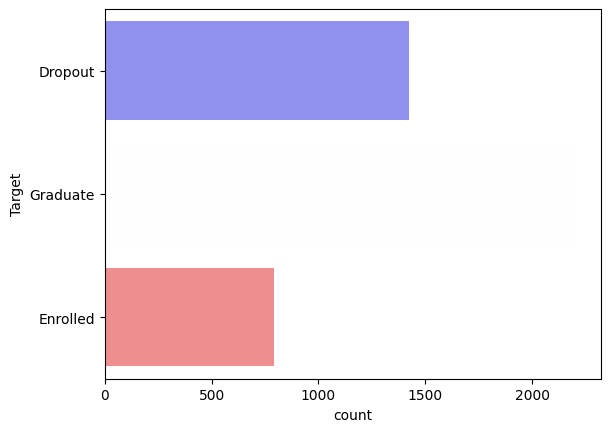

,proportion
Target,
Graduate,0.499322
Dropout,0.321203
Enrolled,0.179476


In [10]:
sns.countplot(data.Target, palette="bwr")
plt.show()
data.Target.value_counts(normalize=True)

## Convert Dropout =0, Graduate=1, Enrolled=3

In [11]:
data = pd.read_csv("dataset.csv", sep=";")
data["Target"]=data.Target.map(dict( Dropout =0, Graduate=1, Enrolled=2))

### select only Dropout and Graduate because the number of Enrolled students is very low

In [12]:
data = data[data['Target'] != 2]

### Read the input and the output

In [13]:
X = data.drop("Target",axis=1)
y = data["Target"]

In [14]:
X.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,6,1,11,1,1,1,1,3,4,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,5,1,1,1,22,27,10,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,8,2,15,1,1,1,23,27,6,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,12,1,3,0,1,1,22,28,10,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [15]:
y.head()

,Target
0,0
1,1
2,0
3,1
4,1


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X.iloc[:,-2:]=scaler.fit_transform(X.iloc[:,-2:])

In [17]:
X[:2]

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0,0.000000,0,10.8,0.488889,0.766182
1,1,6,1,11,1,1,1,1,3,4,...,0,0,6,6,6,13.666667,0,13.9,0.111111,0.640687


In [18]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn , direction='backward')
X_new=sfs.fit_transform(X, y)
print(X.columns[sfs.get_support()].to_list())
X=X_new

['Application order', 'Nacionality', "Mother's qualification", "Mother's occupation", "Father's occupation", 'Debtor', 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Unemployment rate']


<Axes: >

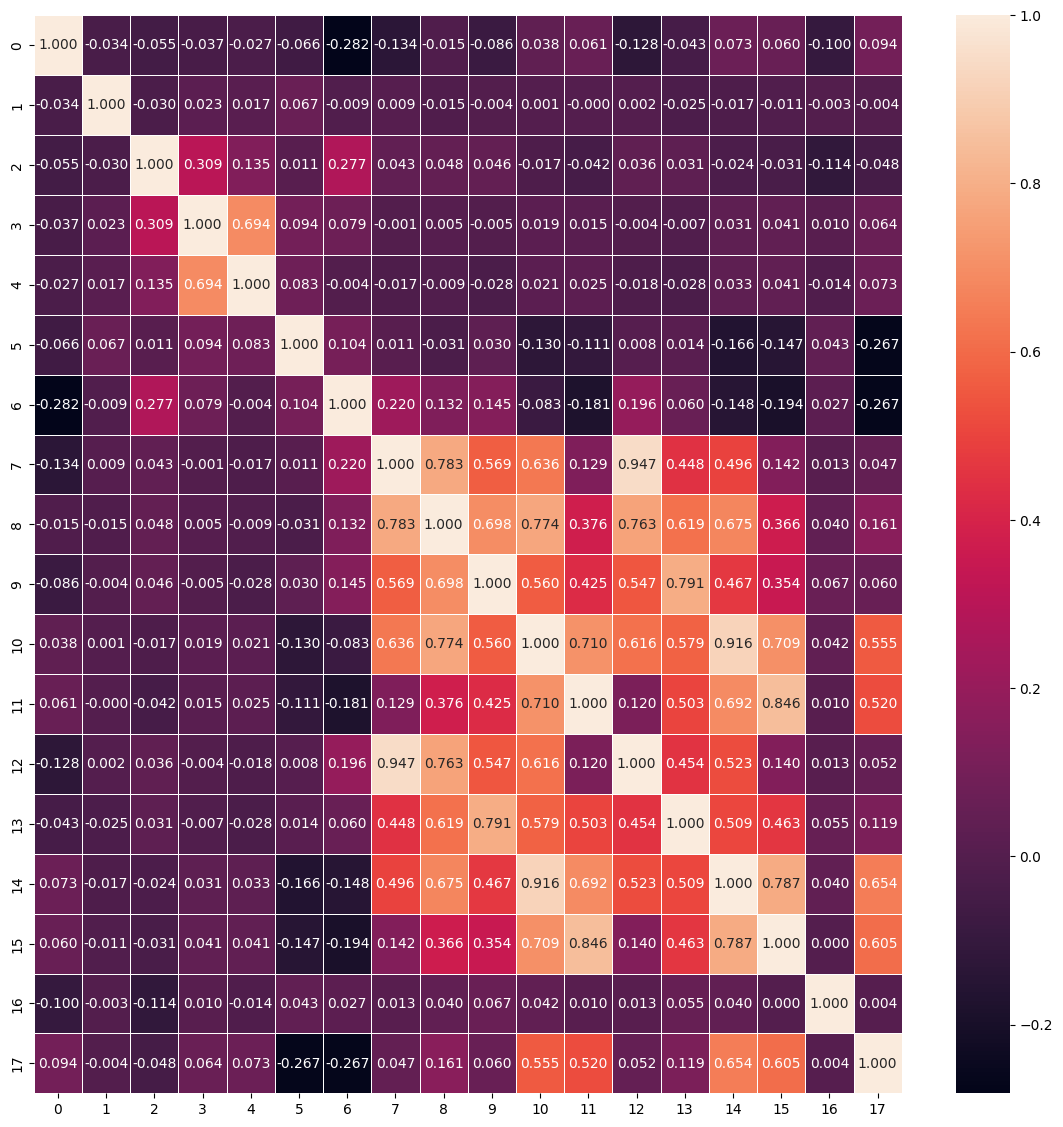

In [19]:
#correlation map
data=np.column_stack([X, y])
data = pd.DataFrame(data)
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.3f',ax=ax)

## Data scaling

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

## Data splitting

In [21]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=10)

## Build models

## Logistic Regression Model

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(max_iter=1000)
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(X_train,y_train)

y_pred = logreg_cv.predict(X_test)
print(logreg_cv.best_params_, logreg_cv.best_score_)



{'C': 1.0, 'penalty': 'l2'} 0.9039236749955487


### Metrics calculation

Accuracy is:  0.9393939393939394
The sensitifity =  0.9771309771309772
The specificity =  0.8653061224489796
The precision =  0.9343936381709742
The F1-score =  0.9552845528455285


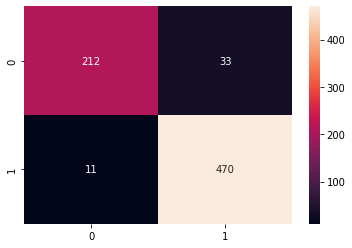

In [ ]:
ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")
tp,fn,fp,tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
sensitifity = tp / (tp + fn)
specificity =tn/(fp+tn)
precision = tp / (tp + fp)
fscore=2*((precision*sensitifity)/(precision+sensitifity))
sensitifity=tp/(tp+fn)
print("The sensitifity = ", sensitifity)
print("The specificity = ", specificity)
print("The precision = ", precision)
print("The F1-score = ", fscore)

## SVM

In [ ]:
model = SVC()
params = {'kernel': ['linear', 'rbf'], 'C': np.arange(0.5,1,0.1), 'gamma': np.arange(0.01,0.05,0.01)}
cv_svm = GridSearchCV(model, param_grid=params, scoring="accuracy", n_jobs=-1,cv=5)
cv_svm.fit(X_train, y_train)
y_pred = cv_svm.predict(X_test)
print(cv_svm.best_params_, cv_svm.best_score_)

{'C': 0.6, 'gamma': 0.01, 'kernel': 'linear'} 0.9046091756187311


Accuracy is:  0.9380165289256198
The sensitifity =  0.9875259875259875
The specificity =  0.8408163265306122
The precision =  0.9241245136186771
The F1-score =  0.9547738693467337


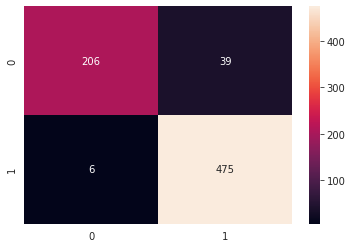

In [ ]:
ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")
tp,fn,fp,tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
sensitifity = tp / (tp + fn)
specificity =tn/(fp+tn)
precision = tp / (tp + fp)
fscore=2*((precision*sensitifity)/(precision+sensitifity))
sensitifity=tp/(tp+fn)
print("The sensitifity = ", sensitifity)
print("The specificity = ", specificity)
print("The precision = ", precision)
print("The F1-score = ", fscore)

## Random Forest implementation

In [ ]:
model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
cv_rf = GridSearchCV(model, param_grid=param_grid, scoring="accuracy", n_jobs=-1, cv=5,verbose=3)
cv_rf.fit(X_train, y_train)
y_pred = cv_rf.predict(X_test)
print(cv_rf.best_params_, cv_rf.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'n_estimators': 400} 0.8980699151284943


Accuracy is:  0.931129476584022
The sensitifity =  0.972972972972973
The specificity =  0.8489795918367347
The precision =  0.9267326732673268
The F1-score =  0.949290060851927


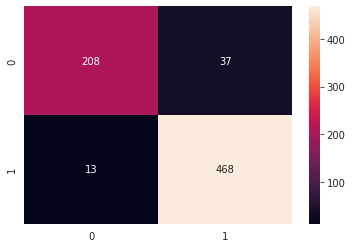

In [ ]:
ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")
tp,fn,fp,tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
sensitifity = tp / (tp + fn)
specificity =tn/(fp+tn)
precision = tp / (tp + fp)
fscore=2*((precision*sensitifity)/(precision+sensitifity))
sensitifity=tp/(tp+fn)
print("The sensitifity = ", sensitifity)
print("The specificity = ", specificity)
print("The precision = ", precision)
print("The F1-score = ", fscore)

## MLP implementation

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_gs = MLPClassifier(max_iter=1000)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train) # X is train samples and y is the corresponding labels
y_pred=clf.predict(X_test)
print(clf.best_params_, clf.best_score_)

{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'sgd'} 0.9063315330286663


Accuracy is:  0.9393939393939394
The sensitifity =  0.9792099792099792
The specificity =  0.8612244897959184
The precision =  0.9326732673267327
The F1-score =  0.9553752535496958


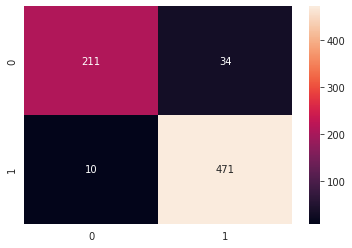

In [ ]:
ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")
tp,fn,fp,tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
sensitifity = tp / (tp + fn)
specificity =tn/(fp+tn)
precision = tp / (tp + fp)
fscore=2*((precision*sensitifity)/(precision+sensitifity))
sensitifity=tp/(tp+fn)
print("The sensitifity = ", sensitifity)
print("The specificity = ", specificity)
print("The precision = ", precision)
print("The F1-score = ", fscore)

GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# A sample parameter

parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.075, 0.15],
    "min_samples_split": np.linspace(0.3, 0.5, 2),
    "min_samples_leaf": np.linspace(0.3, 0.5, 2),
    "max_depth":[8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[ 0.75, 0.95],
    "n_estimators":[10]
    }
#passing the scoring function in the GridSearchCV
clf = GridSearchCV(GradientBoostingClassifier(), parameters,cv=5, n_jobs=-1, verbose=3)

clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


Accuracy is:  0.8746556473829201
The sensitifity =  0.9376299376299376
The specificity =  0.7510204081632653
The precision =  0.880859375
The F1-score =  0.9083585095669688


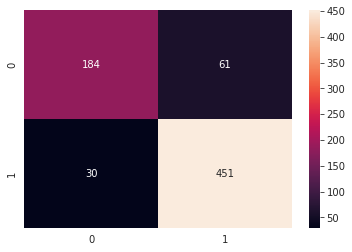

In [ ]:
ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")
tp,fn,fp,tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
sensitifity = tp / (tp + fn)
specificity =tn/(fp+tn)
precision = tp / (tp + fp)
fscore=2*((precision*sensitifity)/(precision+sensitifity))
sensitifity=tp/(tp+fn)
print("The sensitifity = ", sensitifity)
print("The specificity = ", specificity)
print("The precision = ", precision)
print("The F1-score = ", fscore)

## Voting Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV


eclf = VotingClassifier(estimators=[
    ('svm', SVC(probability=True)),
    ('lr', LogisticRegression()),
    ], voting='soft')

#Use the key for the classifier followed by __ and the attribute
params = {'lr__C': [1.0, 100.0],
      'svm__C': [2,3,4],}

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5,n_jobs=-1, verbose=3)

grid.fit(X_train,y_train)
print (grid.best_params_)

y_pred=grid.predict(X_test)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'lr__C': 1.0, 'svm__C': 2}


Accuracy is:  0.9366391184573003
The sensitifity =  0.9771309771309772
The specificity =  0.8571428571428571
The precision =  0.9306930693069307
The F1-score =  0.9533468559837729


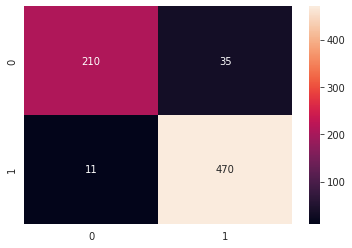

In [ ]:
ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")
tp,fn,fp,tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
sensitifity = tp / (tp + fn)
specificity =tn/(fp+tn)
precision = tp / (tp + fp)
fscore=2*((precision*sensitifity)/(precision+sensitifity))
sensitifity=tp/(tp+fn)
print("The sensitifity = ", sensitifity)
print("The specificity = ", specificity)
print("The precision = ", precision)
print("The F1-score = ", fscore)

## SGD classifier

In [ ]:
# Implementing Linear_SGD classifier
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=1000)
Cs = [0.0001,0.001, 0.01, 0.1, 1, 10]
tuned_parameters = [{'alpha': Cs}]
model = GridSearchCV(clf, tuned_parameters, scoring = 'accuracy', cv=5,n_jobs=-1, verbose=3)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


Accuracy is:  0.9338842975206612
The sensitifity =  0.9792099792099792
The specificity =  0.8448979591836735
The precision =  0.925343811394892
The F1-score =  0.9515151515151514


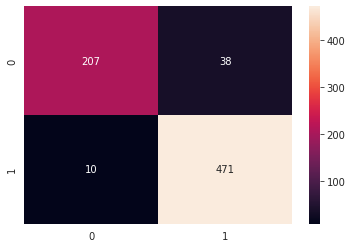

In [ ]:
ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")
tp,fn,fp,tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
sensitifity = tp / (tp + fn)
specificity =tn/(fp+tn)
precision = tp / (tp + fp)
fscore=2*((precision*sensitifity)/(precision+sensitifity))
sensitifity=tp/(tp+fn)
print("The sensitifity = ", sensitifity)
print("The specificity = ", specificity)
print("The precision = ", precision)
print("The F1-score = ", fscore)

In [ ]:
from sklearn.ensemble import BaggingClassifier

bc_params = {"base_estimator__max_depth": [3,5,10,20],
          "base_estimator__max_features": [None, "auto"],
          "base_estimator__min_samples_leaf": [1, 3, 5, 7, 10],
          "base_estimator__min_samples_split": [2, 5, 7],
          'bootstrap_features': [False, True],
          'max_features': [0.5, 0.7, 1.0],
          'max_samples': [0.5, 0.7, 1.0],
          'n_estimators': [2, 5, 10, 20],
}


bc_gs = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()), bc_params, cv=5, verbose=3)
bc_gs.fit(X_train, y_train)
y_pred=bc_gs.predict(X_test)

Streaming output truncated to the last 5000 lines.
[CV 1/5] END base_estimator__max_depth=20, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.859 total time=   0.0s
[CV 2/5] END base_estimator__max_depth=20, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.826 total time=   0.0s
[CV 3/5] END base_estimator__max_depth=20, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features=False, max_features=0.5, max_samples=1.0, n_estimators=2;, score=0.845 total time=   0.0s
[CV 4/5] END base_estimator__max_depth=20, base_estimator__max_features=auto, base_estimator__min_samples_leaf=1, base_estimator__min_samples_split=5, bootstrap_features

Accuracy is:  0.928374655647383
The sensitifity =  0.9771309771309772
The specificity =  0.8326530612244898
The precision =  0.9197651663405088
The F1-score =  0.9475806451612903


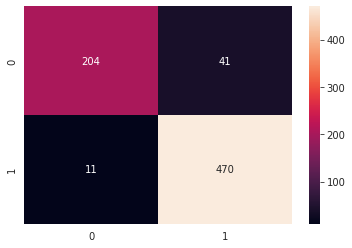

In [ ]:
ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")
tp,fn,fp,tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
sensitifity = tp / (tp + fn)
specificity =tn/(fp+tn)
precision = tp / (tp + fp)
fscore=2*((precision*sensitifity)/(precision+sensitifity))
sensitifity=tp/(tp+fn)
print("The sensitifity = ", sensitifity)
print("The specificity = ", specificity)
print("The precision = ", precision)
print("The F1-score = ", fscore)

## Stacking Classifeir

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

Accuracy is: 93.6
The sensitifity =  0.9833679833679834
The specificity =  0.8489795918367347
The precision =  0.9274509803921569
The F1-score =  0.9545913218970736


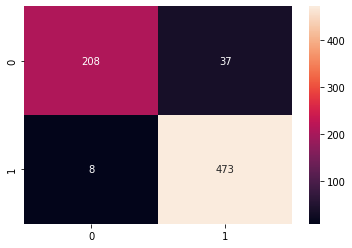

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier

# define the base models
level0 = list()
level0.append(('LR', LogisticRegression(C= 0.1, penalty='l2')))
level0.append(('RF',RandomForestClassifier(n_estimators= 300)))
level0.append(('DT', DecisionTreeClassifier(max_depth=6, min_samples_leaf=1, min_samples_split=2, splitter= 'random')))
level0.append(('SGD',SGDClassifier(alpha= 0.01)))
level0.append(('XGB',XGBClassifier(subsample= 0.8, min_child_weight= 5, max_depth= 5, gamma= 1, colsample_bytree= 0.8)))
level0.append(('MLP',MLPClassifier(activation= 'relu', alpha= 0.0001, hidden_layer_sizes= (20,), learning_rate= 'adaptive', solver= 'adam')))
level0.append(('Adaboost',AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6, min_samples_leaf=1, min_samples_split=2, splitter= 'random'))))
level0.append(('bagging',BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=6, min_samples_leaf=1, min_samples_split=2, splitter= 'random'))))

# define meta learner model
level1= SVC(C= 0.7999999999999999, gamma= 0.04, kernel= 'rbf')
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")
tp,fn,fp,tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
sensitifity = tp / (tp + fn)
specificity =tn/(fp+tn)
precision = tp / (tp + fp)
fscore=2*((precision*sensitifity)/(precision+sensitifity))
sensitifity=tp/(tp+fn)
print("The sensitifity = ", sensitifity)
print("The specificity = ", specificity)
print("The precision = ", precision)
print("The F1-score = ", fscore)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


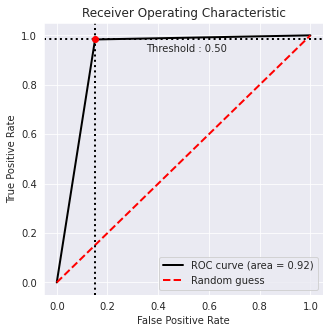

In [ ]:
!pip install scikit-plot
!pip install plot-metric
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

Logistic Regression , SVM , MLP are the largest accuracy with 93.8 %